Load the libraries below.

In [1]:
 library("tidyverse")
 library("jsonlite")
 library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




This function `get_data` will get the new case counts over time from Utah.  

In [2]:
get_data = function() {
    
    state = "UT" # two letter state code 
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", state)
    
    # Don't worry about this part for the moment👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    }

Adjust the function above to take a state code as an argument and to set the `state` variable inside the function to the value of the argument.

In [3]:
get_data = function(state_code) {
    
    state = state_code 
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", state)
    
    # Don't worry about this part for the moment👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    }

Hint: here is an example of a function that just takes an argument called `state_code` and returns the value of the `state` variable.

```R
state_code_function = function(state_code) {
    
    state = state_code
    
    return(state)
    
}
```

Use your function to plot new cases over time for any state.

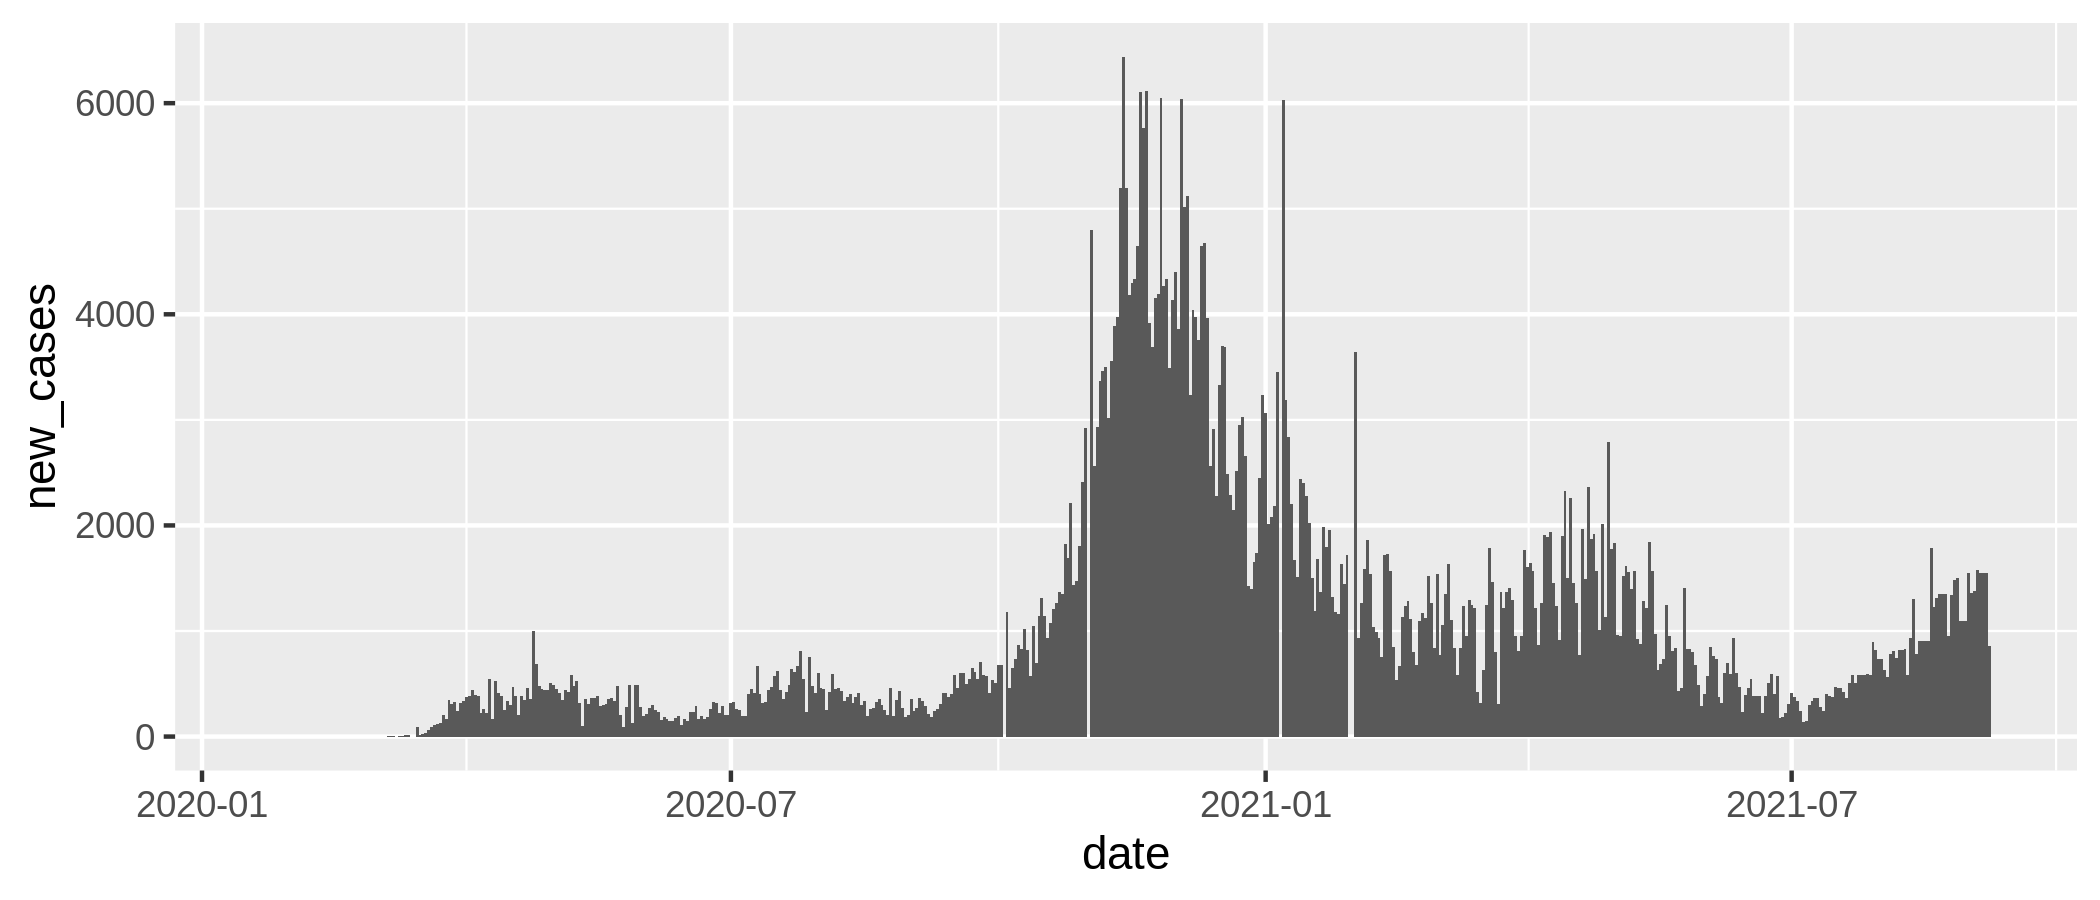

In [13]:
 options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

 df = get_data("CO")
#calling the function here (get_data)

 p = ggplot(df, aes(x = date, y = new_cases))

 p = p + geom_col(width = 1)

 p

## 🛑 STOP HERE 🛑

If you had data for multiple states in one table, what column would you use to "facet" your data by state?

Using the function you built above, capture the case data for two states in two separate tables.

E.g. for each state do something like this:

```R
df_UT = get_datat("UT")
```

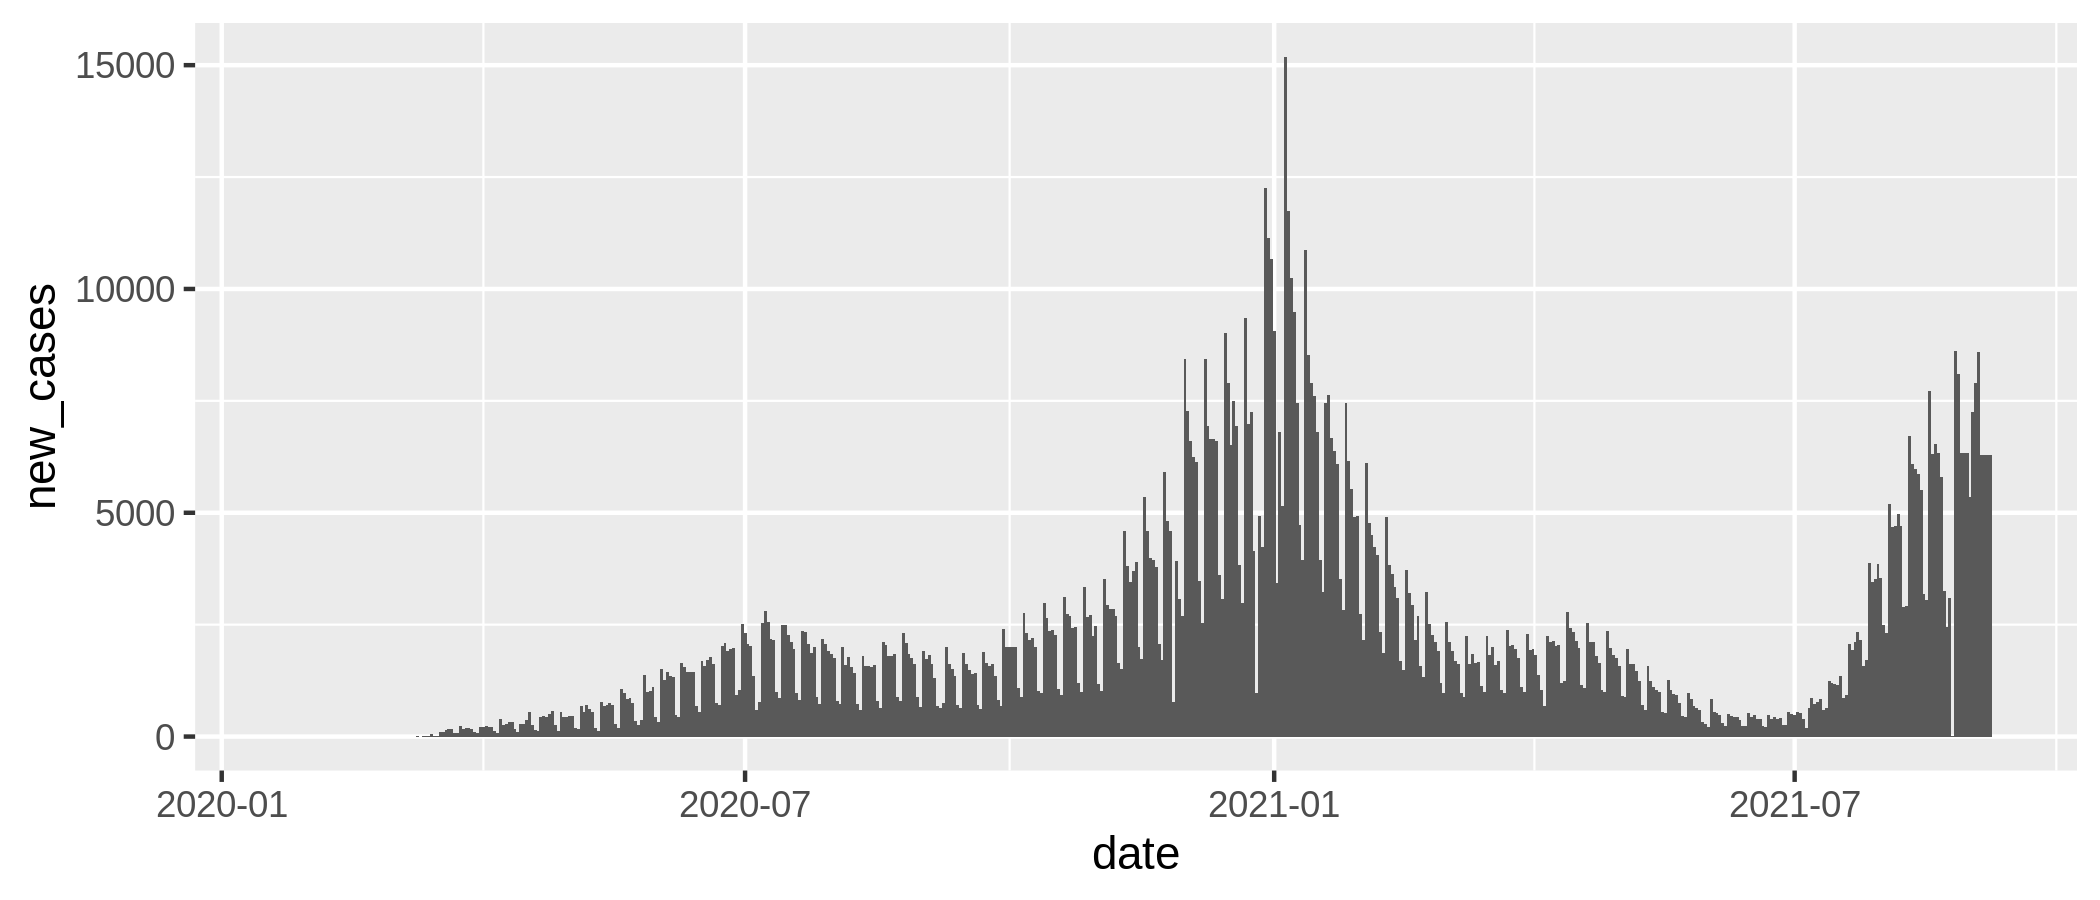

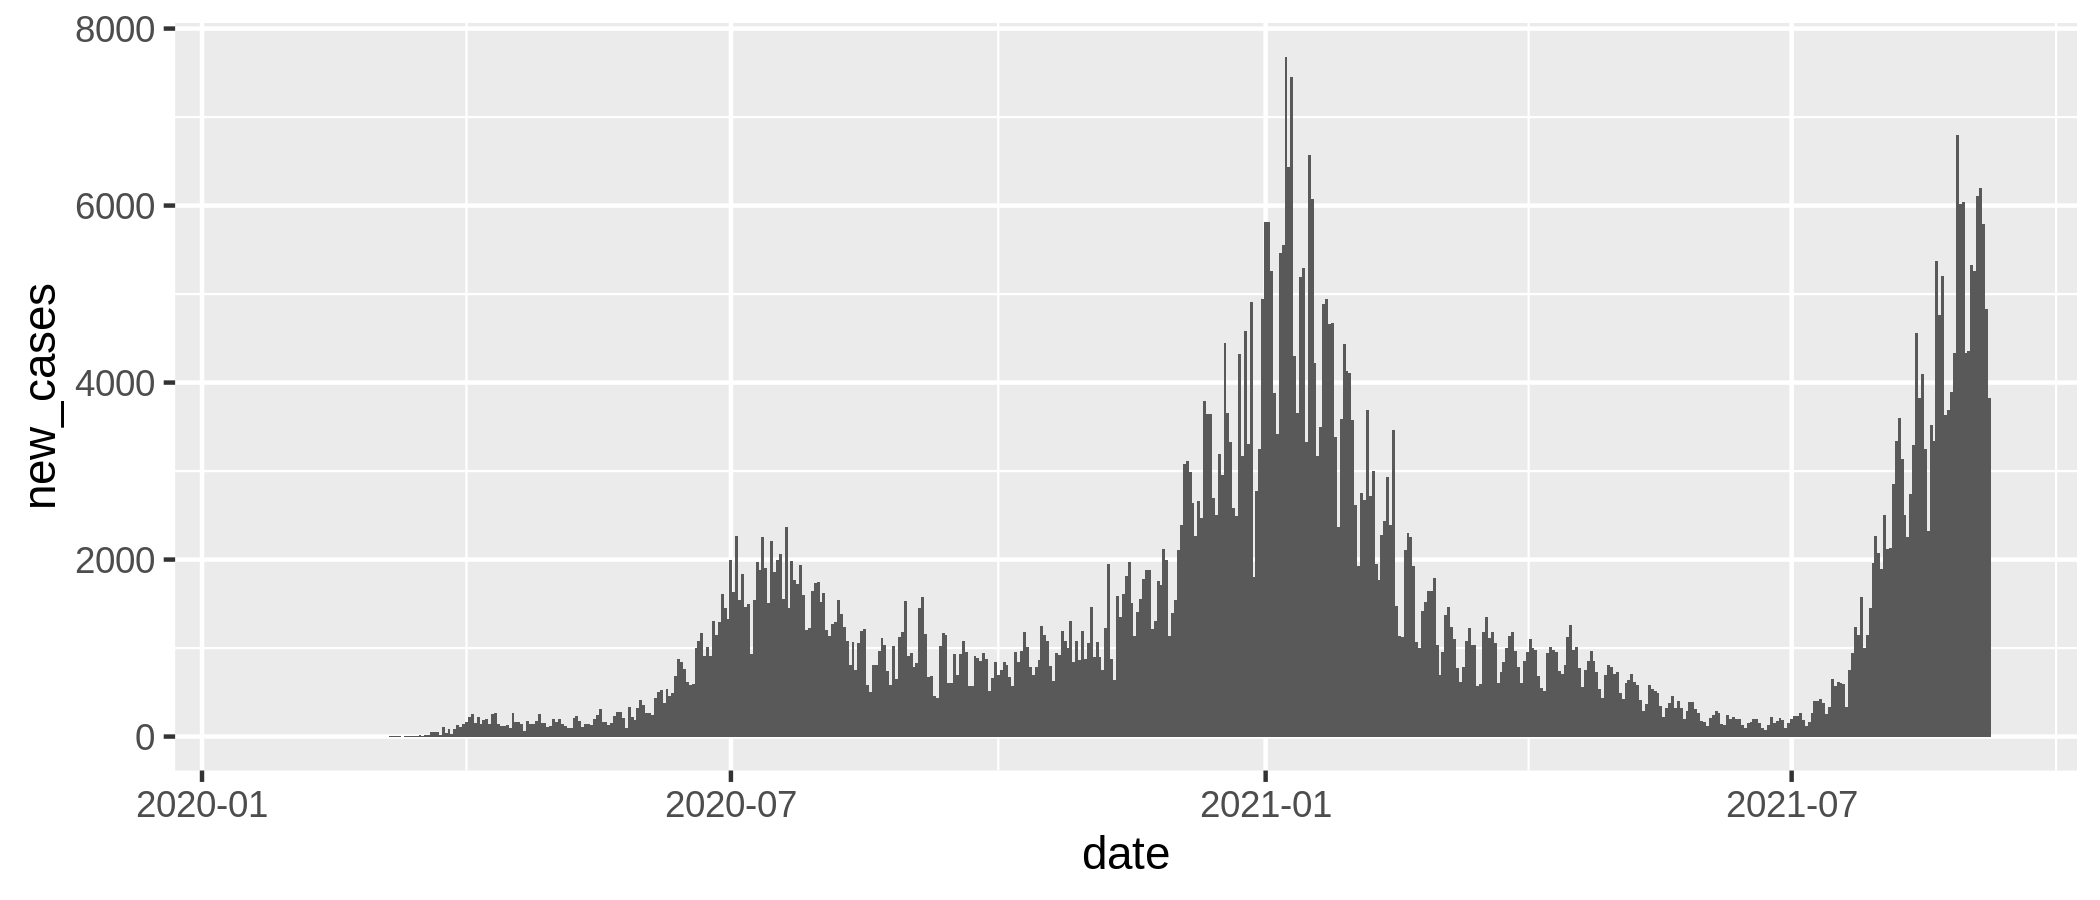

In [32]:
df_NC = get_data("NC")
df_SC = get_data("SC")


options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

 #df_NC = get_data("NC")

 p = ggplot(df_NC, aes(x = date, y = new_cases))

 p = p + geom_col(width = 1)

 p
#capturing data for NC in a table


 #df_SC = get_data("SC")

 p2 = ggplot(df_SC, aes(x = date, y = new_cases))

 p2 = p2 + geom_col(width = 1)

 p2
#capturing data for SC in a table

We can concatenate these two tables using the `rbind` function. Read the help documentation for `rbind` to see how it works, then concatenate your two tables. 

In [33]:
# In the lab interface use help(rbind) %>% print
#?rbind

In [34]:
# concatenate your tables here (look it up in documentation)

In [35]:
x = rbind(df_NC,df_SC)
#this concatenates the data from the two states, not the tables that we have created when I originally had rbind(p, p2)

Use `geom_bar` to confirm that you indeed have two states in your concatenated table.

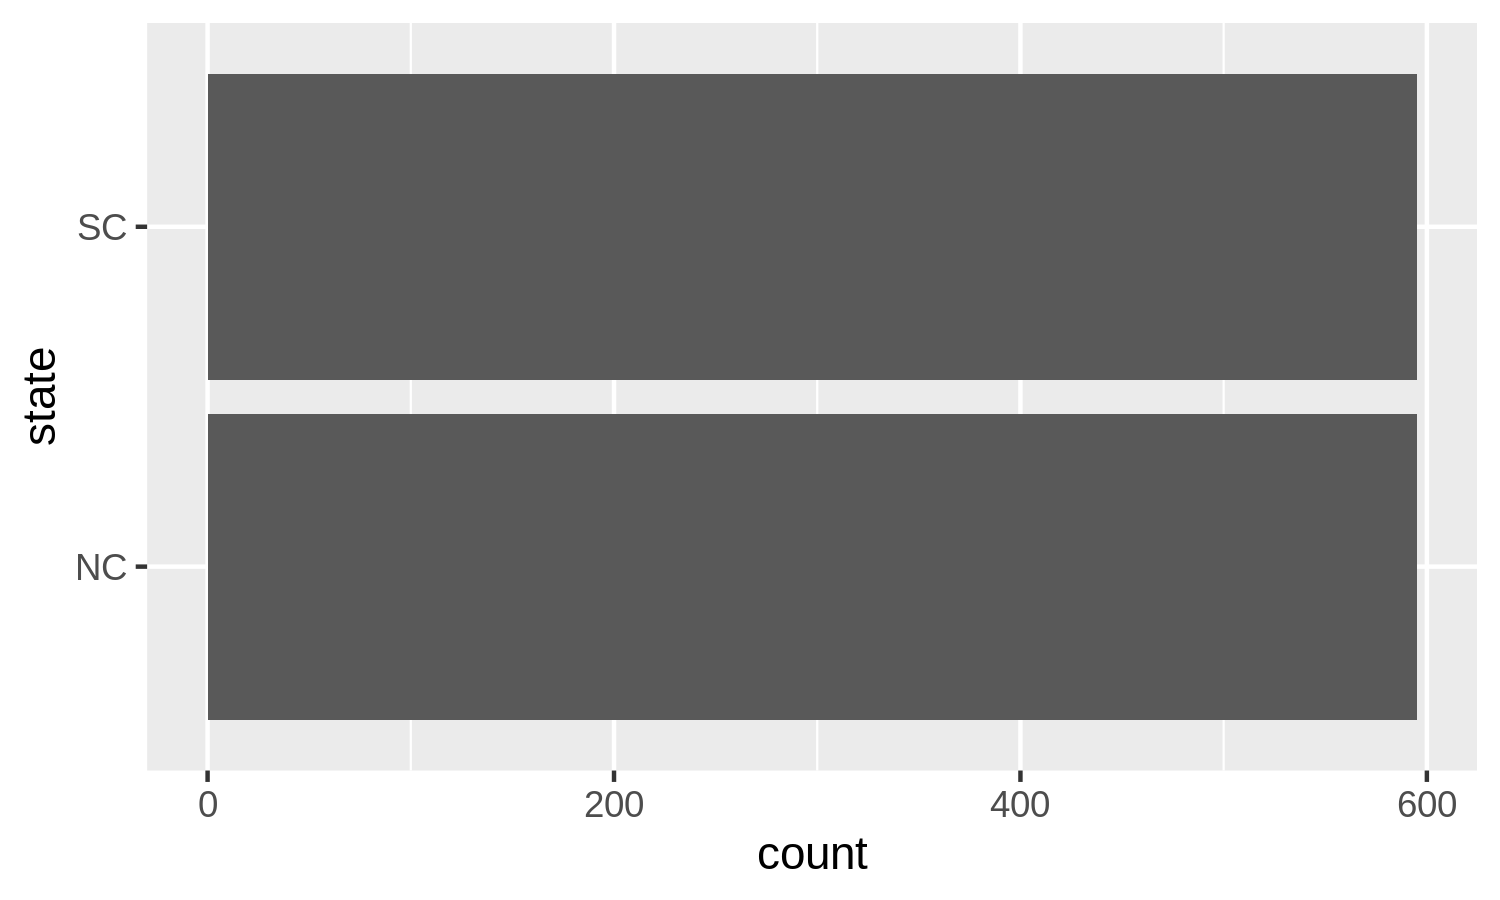

In [37]:
options (repr.plot.height = 3 , repr.plot.width = 5)
p = ggplot(x, aes(y =state))
p = p + geom_bar()
p

Make the new cases over time chart like we did above but this time `facet` by state.

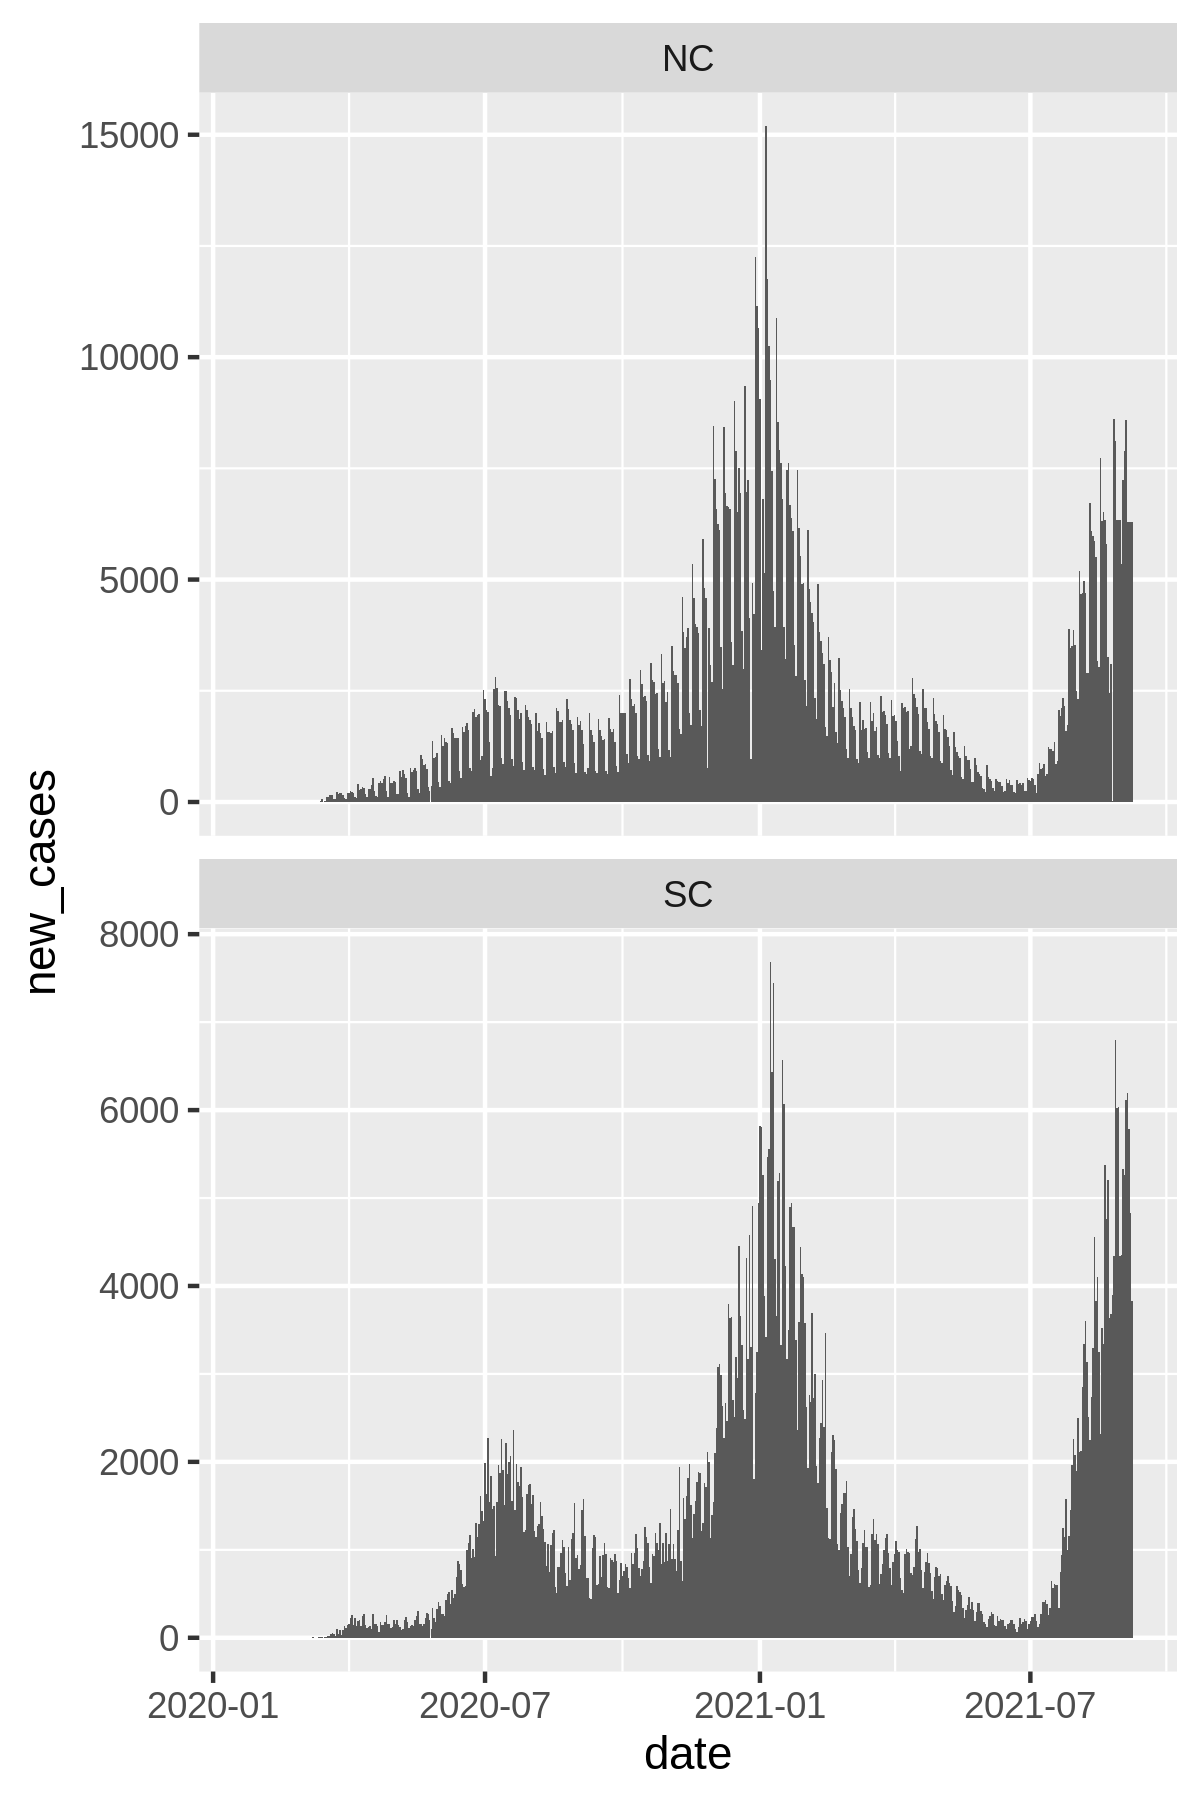

In [45]:
options (repr.plot.height = 6 , repr.plot.width = 4)
p = ggplot(x, aes(x = date, y = new_cases))

p = p + geom_col(width = 1)

p = p + facet_wrap(~state, ncol = 1, scales = "free_y")
#scales argument: free will make the axes independent for every panel free_y makes the y axis independent for each panel
#ncol = 1 will make the two charts stacked on top of each other
p

# Remove Facet and show the Two States another way using bar chart

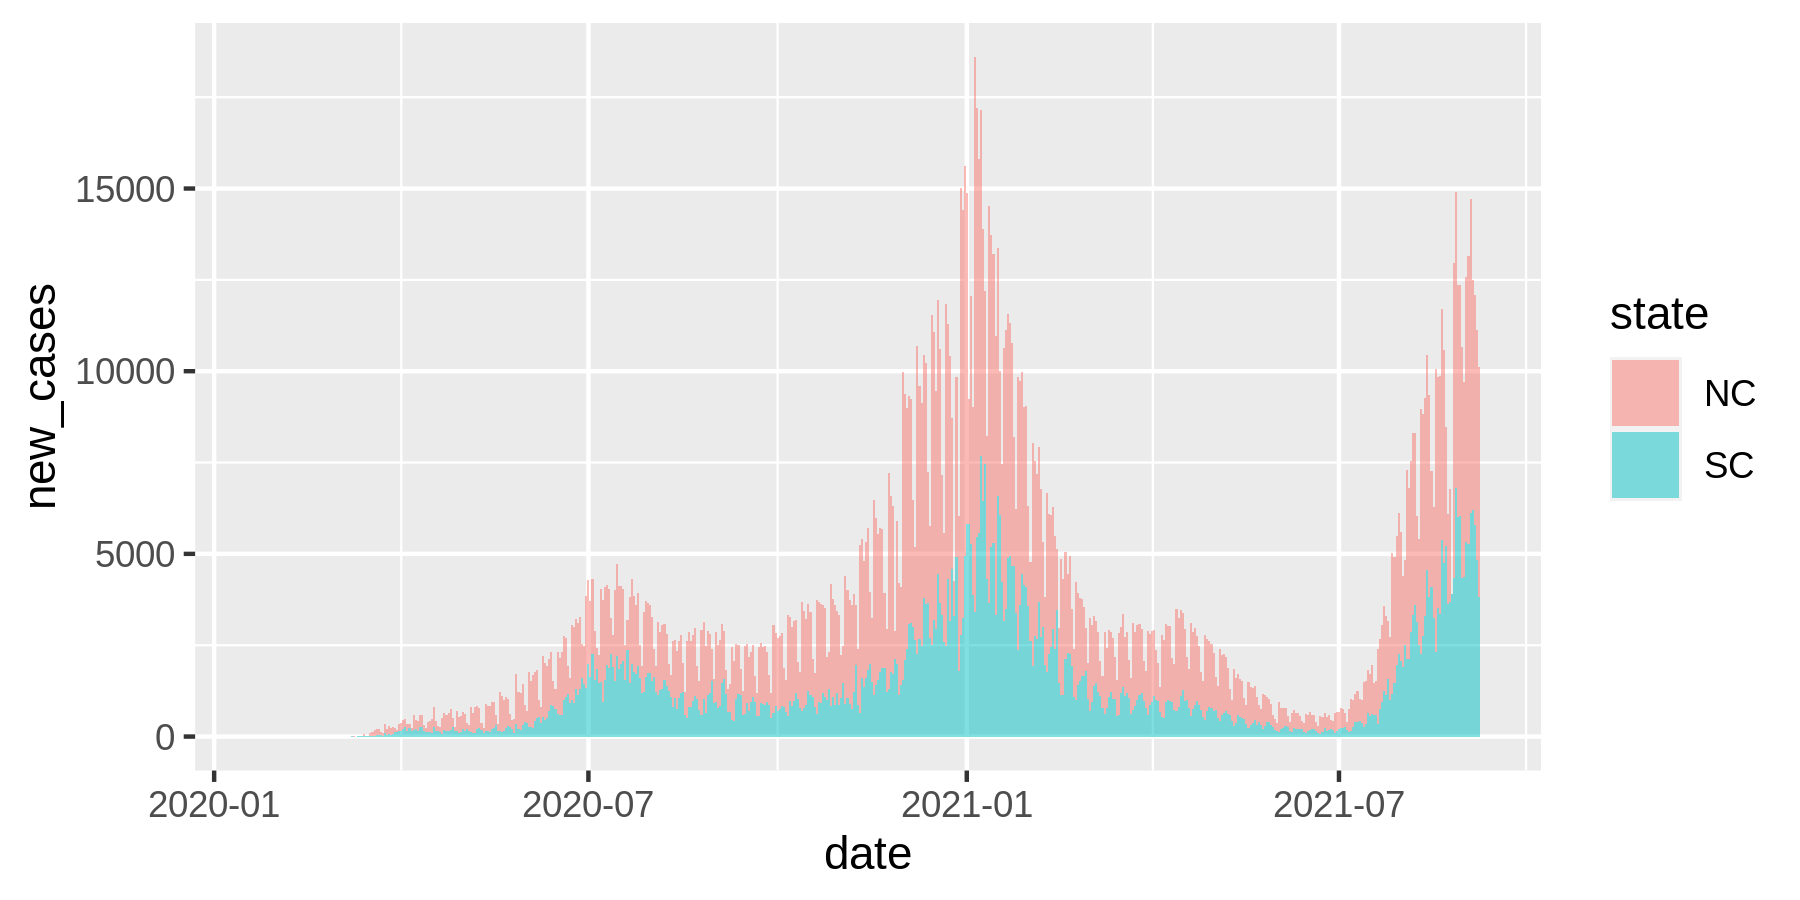

In [53]:
options (repr.plot.height = 3 , repr.plot.width = 6)

p = ggplot(x, aes(x = date, y = new_cases, fill = state))

p = p + geom_col(width = 1, alpha = 0.5)
#alpha changes the opacity of the bars to see if there is overlap

p

#by default, these bars are stacking and giving total cases for both states instead of just placing bars on top of 
#each other like we want, so see below for other options

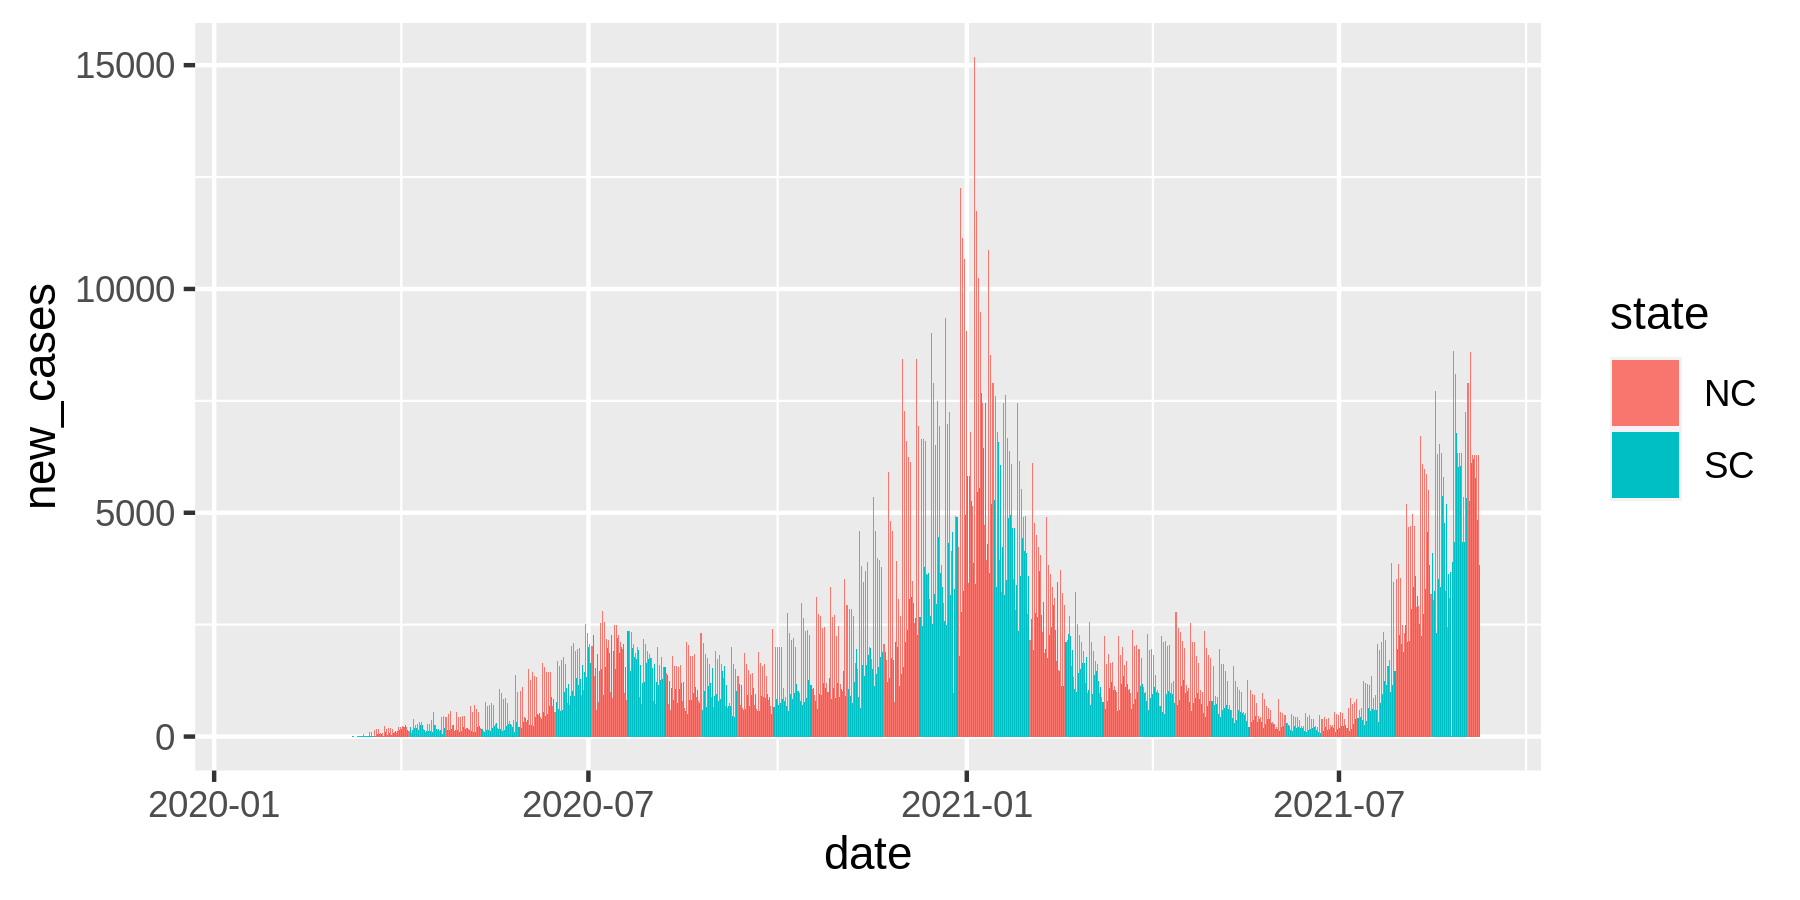

In [52]:
options (repr.plot.height = 3 , repr.plot.width = 6)

p = ggplot(x, aes(x = date, y = new_cases, fill = state))

p = p + geom_col(width = 1, position = "dodge")
#using position = dodge, we put bars side by side instead of on top of each other

p

# Create a Line Graph

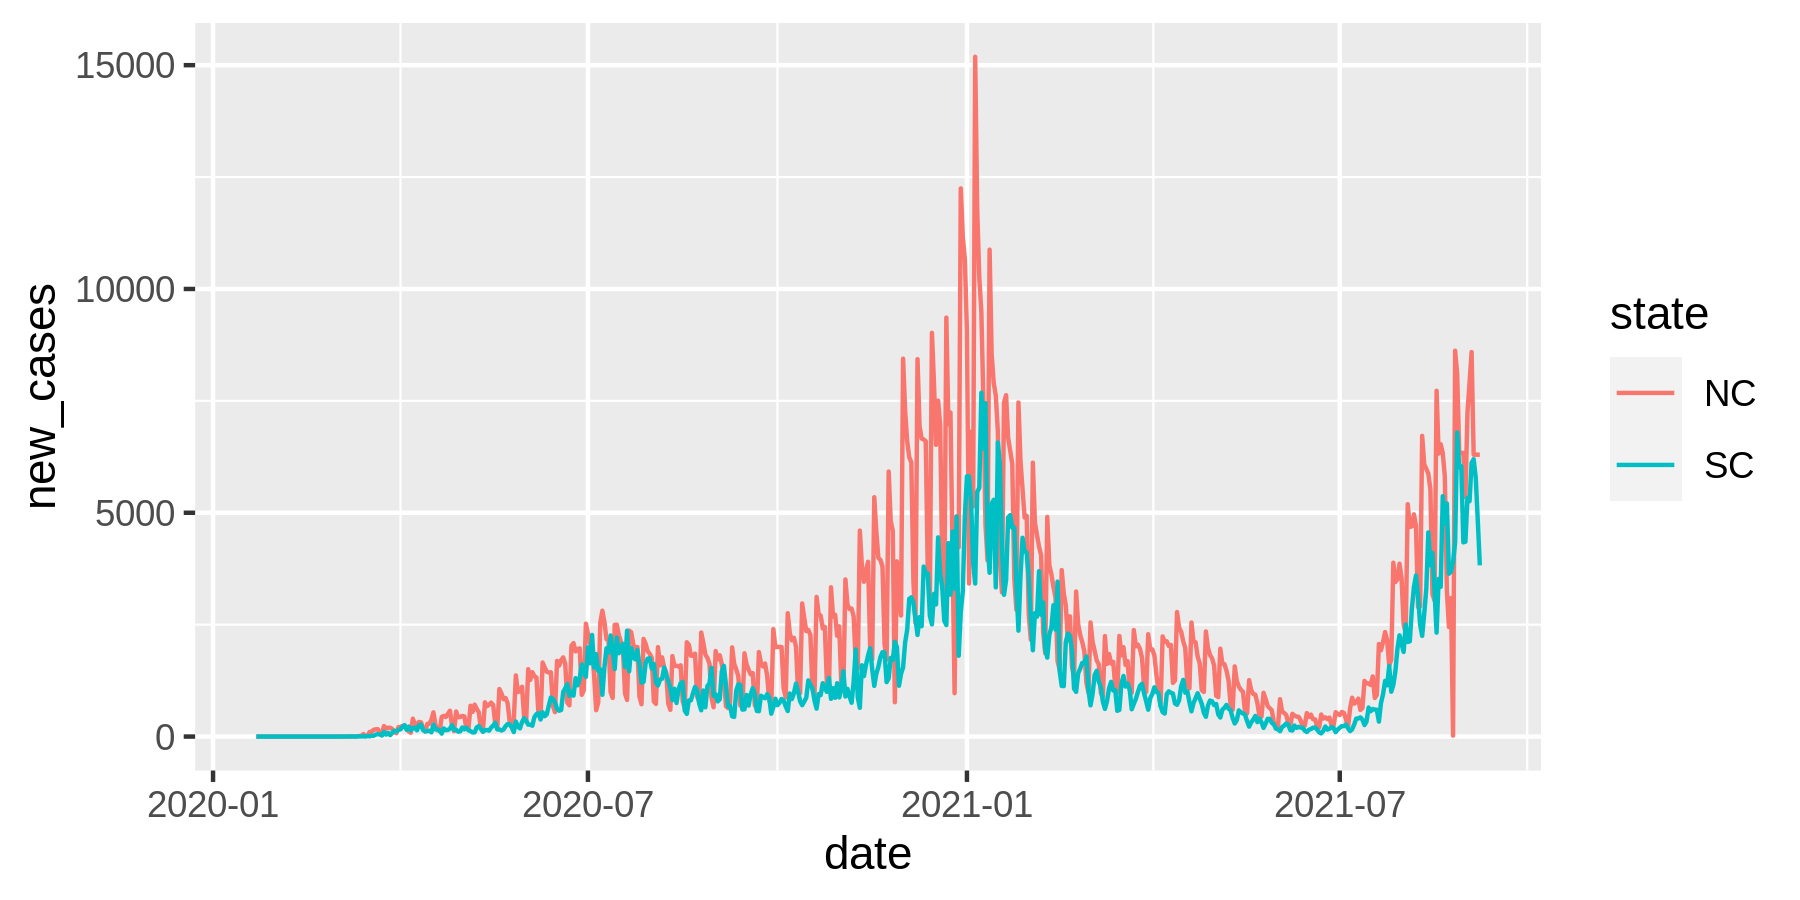

In [55]:
p = ggplot(x, aes(x = date, y = new_cases, color = state))
#use group for line plot to plot independent lines, but use color for line plot and it will automatically group while
#doing different colors

p = p + geom_line()
#using position = dodge, we put bars side by side instead of on top of each other

p